<hr style="border:1px solid black; width:98%" />

># Exploring Cultural Diversity in MoMA's Art Collection

<hr style="border:1px solid black; width:98%" />

## Introduction

- MoMA, based in New York City, is renowned for its diverse and influential collection of modern and contemporary art.
- With a mission to showcase the ever-evolving landscape of artistic expression, MoMA houses works that reflect the dynamism and diversity of the international art scene.
- Understanding the cultural diversity within MoMA is essential for appreciating the global impact of artistic movements and informing curatorial decisions.


---

## Description of the dataset

 MOMA has two different sets of dataset:
- The Artists dataset contains 15,243 records, representing all the artists who have work in MoMA's collection.It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.  
- The Artworks dataset contains 140,848 records, representing all of the works that have been accessioned into MoMA’s collection. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum 

---

## Problem statement

Analyze MoMA's collection to uncover geographical contributions and assess cross-cultural representation of artistic movements. Explore patterns and temporal trends to gain insights into cultural diversity within the collection.

---

## Observations

 - The merged dataset contains 131891 rows and 37 columns.
 - The data has a lot of missing values and requires a lot of cleaning
 - The unique values shows that the MOMA dataset contains information about 114 different countries.
 - MOMA dataset has a well kept record, the youngest artist they have was born in 2016 (just 8 year sold), which can be observed from the max value in statistical summary of birth years of artists
 - From the top nationalities graph it is observed that America has the maximum contribution to MOMA collection totalling to around 45%


---

## Results and Inferences

### The analysis of top 5 nations on different aspects gave the following results

#### Classification
>Photographs and Prints show a domination in almost all the nationalities as these mediums offer versatile avenues for artistic expression, shaping collective memories and societal narratives across diverse cultural contexts.

#### Credit Lines
>Gifts are the most common way through which MOMA acquired its artworks. The acquisition patterns of these nations highlight their cultural values, traditions, and commitments to preserving and promoting artistic heritage through diverse avenues of support and investment.

#### Temporal Trends
> In America, the gradual decrease in the number of artists, especially between 1969 and 1971, may be attributed to various socio-economic and cultural factors. Economic recessions during this period could have led to reduced funding for the arts, resulting in fewer opportunities for artists and a decline in artistic production
  
> Conversely, the increase in the number of artists in Germany and France during the same period could be attributed to factors such as economic growth, increased government support for the arts, or cultural movements that encouraged artistic expression. 

#### Artists
> The sparse representation of nations like Afghanistan, Iraq, Wales, the United Arab Emirates, and Bangladesh in the MoMA collection, with only one or two artists documented, may stem from factors such as historical conflicts, limited cultural resources, and challenges in accessing global art networks. These nations may face barriers to artistic visibility and recognition on the international stage due to structural inequalities and unequal power dynamics in the art world.

---

## Conclusions

The exploration of the MoMA dataset has offered valuable insights into the museum's collection, with a particular focus on artist nationality as a lens for understanding different trends. By analyzing the distribution of nationalities among artists and their contributions, we've uncovered diverse patterns in artistic representation and cultural heritage. Through interactive visualizations, we've delved into various aspects such as artwork classification, acquisition methods, and trends over time, shedding light on the interconnectedness and richness of global art scenes

---

## References

- Documentation: https://medium.com/analytics-vidhya
- Pandas: https://pandas.pydata.org/docs/
- Matplotlib: https://matplotlib.org/stable/index.html
- Seaborn: https://seaborn.pydata.org/
- Plotly: https://plotly.com/python/
- EDA: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

---

<hr style="border:1px solid black; width:98%" />

># *Beginning of EDA*

---

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets

### Loading the datasets

MOMA has two different datasets 

> The Artists dataset 

In [49]:
artists = pd.read_csv('datasets/Artists.txt')
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


> The Artworks dataset 

In [50]:
artworks = pd.read_csv('datasets/Artworks.txt')
artworks.head(3)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN


---

<hr style="border:1px solid black; width:98%" />

# Data cleaning

---

> Merging the two datasets

In [51]:
artists['ConstituentID'] = artists['ConstituentID'].astype(str)

In [55]:
merged_df = pd.merge(artists, artworks, on='ConstituentID')
merged_df.head(3)

,ConstituentID,DisplayName,ArtistBio_x,Nationality_x,Gender_x,BeginDate_x,EndDate_x,Wiki QID,ULAN,Title,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN,Study for Head Bath,...,http://www.moma.org/media/W1siZiIsIjMwODE4MyJd...,NaN,NaN,NaN,105.7,NaN,NaN,75.9,NaN,NaN
1,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN,General Nuke,...,NaN,NaN,NaN,NaN,80.5,NaN,NaN,59.2,NaN,NaN
2,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN,BAS-RELIEF,...,NaN,NaN,NaN,NaN,54.7,NaN,NaN,39.7,NaN,NaN


> Unique values in the dataset

In [53]:
merged_df.nunique()

ConstituentID          11163
DisplayName            11125
ArtistBio_x             6206
Nationality_x            114
Gender_x                   6
BeginDate_x              221
EndDate_x                168
Wiki QID                3092
ULAN                    2827
Title                  93387
Artist                 11125
ArtistBio_y             6206
Nationality_y            115
BeginDate_y              221
EndDate_y                168
Gender_y                   7
Date                    8521
Medium                 19899
Dimensions             81522
CreditLine              6954
AccessionNumber       131891
Classification            35
Department                 8
DateAcquired            1678
Cataloged                  2
ObjectID              131891
URL                    88580
ThumbnailURL           78173
Circumference (cm)         9
Depth (cm)              1286
Diameter (cm)            491
Height (cm)             3782
Length (cm)              364
Weight (kg)              199
Width (cm)    

In [6]:
merged_df.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio_x', 'Nationality_x',
       'Gender_x', 'BeginDate_x', 'EndDate_x', 'Wiki QID', 'ULAN', 'Title',
       'Artist', 'ArtistBio_y', 'Nationality_y', 'BeginDate_y', 'EndDate_y',
       'Gender_y', 'Date', 'Medium', 'Dimensions', 'CreditLine',
       'AccessionNumber', 'Classification', 'Department', 'DateAcquired',
       'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)',
       'Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)',
       'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)'],
      dtype='object')

> It is observed that the column names 'BeginDate' and 'EndDate'in the MoMA dataset are somewhat confusing, representing the birth and death years of artists. To enhance clarity, renaming these columns to 'Birth_year' and 'Death_year' respectively, and also renaming 'Date' and 'CreditLine 'column

In [7]:
merged_df.rename(columns= {'BeginDate_x':'Birth_year','EndDate_x':'Death_year','Date':'Date_acquired',
                           'CreditLine':'Acquired_through'},inplace=True)

> - As per the problem statement, in the  dataset, columns like ThumbnailURL, Circumference (cm), Depth (cm), Diameter (cm), Height (cm), Length (cm), Weight (kg) ,Width (cm), Seat Height (cm), Duration, Wiki QID, ULAN are not required.  
> - And there are certain columns which have the same values like birth_year, death_year, gender, nationality etc but are appearing as different columns because their values in the artworks dataset were enclosed within parentheses whereas in artists dataset it is written without parentheses  
> Droping these columns:

In [8]:
columns_to_drop = [ 'ThumbnailURL', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
                   'Length (cm)', 'Weight (kg)' ,'Width (cm)', 'Seat Height (cm)','Duration (sec.)','URL','Dimensions',
                    'DateAcquired','ObjectID','Cataloged','AccessionNumber','Wiki QID', 'ULAN', 
                   'Nationality_y', 'BeginDate_y', 'EndDate_y','Gender_y','ArtistBio_x','ArtistBio_y','Artist']
merged_df.drop(columns = columns_to_drop, inplace = True)
merged_df.head(3)

,ConstituentID,DisplayName,Nationality_x,Gender_x,Birth_year,Death_year,Title,Date_acquired,Medium,Acquired_through,Classification,Department
0,1,Robert Arneson,American,Male,1930,1992,Study for Head Bath,1977,Conté crayon and pencil on paper,Gift of the Friends of Contemporary Drawing,Drawing,Drawings & Prints
1,1,Robert Arneson,American,Male,1930,1992,General Nuke,1986,Lithograph,Gift of Landfall Press,Print,Drawings & Prints
2,2,Doroteo Arnaiz,Spanish,Male,1936,0,BAS-RELIEF,NaN,"Etching, printed in color",Gift of the artist,Print,Drawings & Prints


> Statistical summary

In [9]:
merged_df.describe()

,Birth_year,Death_year
count,131891.000000,131891.000000
mean,1795.317209,1293.636882
std,458.698569,938.091925
min,0.000000,0.000000
25%,1881.000000,0.000000
50%,1911.000000,1953.000000
75%,1937.000000,1986.000000
max,2016.000000,2022.000000


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131891 entries, 0 to 131890
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ConstituentID     131891 non-null  object
 1   DisplayName       131891 non-null  object
 2   Nationality_x     126885 non-null  object
 3   Gender_x          124531 non-null  object
 4   Birth_year        131891 non-null  int64 
 5   Death_year        131891 non-null  int64 
 6   Title             131870 non-null  object
 7   Date_acquired     130414 non-null  object
 8   Medium            123080 non-null  object
 9   Acquired_through  130087 non-null  object
 10  Classification    131890 non-null  object
 11  Department        131891 non-null  object
dtypes: int64(2), object(10)
memory usage: 12.1+ MB


> Droping the rows which have null values

In [11]:
merged_df.dropna(inplace = True)

> Extracting key terms from the 'Acquired_through' column to simplify and streamline analysis. 

In [12]:
for index,row in merged_df.iterrows():
    credit_line = row['Acquired_through']
    if 'gift' in credit_line.lower():
        merged_df.at[index, 'Acquired_through'] = 'Gift'
    elif 'fund' in credit_line.lower():
        merged_df.at[index, 'Acquired_through'] = 'Fund'  
    elif 'collection' in credit_line.lower():
        merged_df.at[index, 'Acquired_through'] = 'Collection' 

<hr style="border:1px solid black; width:98%" />

---

# Data Visualization

---

>## Choropleth Map:
> Purpose: Visualize geographical distribution.

In [58]:
count = merged_df.groupby('Nationality_x').size().reset_index(name='Count')

# ploting the graph
world_map = px.choropleth(count, 
                          locations='Nationality_x', 
                          color='Nationality_x',
                          title='Geographical Contributions to MoMA Collection',
                          locationmode='country names',  
                          labels={'Nationality_x': 'Nationality', 'Count': 'Number of Contributions'},
                          projection='natural earth',
                          color_continuous_scale=px.colors.sequential.Plasma,
                          hover_data={'Nationality_x': True, 'Count': True})
world_map.show()

> The choropleth map is used to represent all the different nationalities that are there in the MOMA dataset for a comprehensive approach, when we hover over any country we can see the number of artists that belong to that particular nationality

---

>## Donut Graph
> Purpose: Compare the number of artists by nationality.

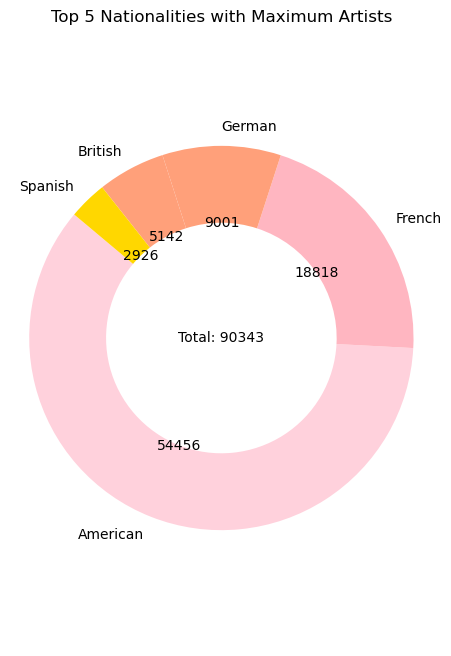

In [17]:
nation = merged_df['Nationality_x'].value_counts()
top_nations = nation.head(5)

# Plotting the graph
plt.figure(figsize=(12, 8))
plt.subplot(122)
plt.pie(top_nations, labels=top_nations.index, colors=['#FFD1DC', '#FFB6C1', '#FFA07A', '#FFA07A', '#FFD700'], autopct=lambda p: '{:.0f}'.format(p * sum(top_nations) / 100), startangle=140, wedgeprops=dict(width=0.4))
plt.title('Top 5 Nationalities with Maximum Artists')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.text(0, 0, f'Total: {top_nations.sum()}', horizontalalignment='center', verticalalignment='center', fontsize=10)
plt.axis('equal')

plt.show()


> ### INSIGHTS:  
> The donut graph above shows the top 5 nationalities with maximum number of artists along with the count of artists, highest being America with 54456 artists,followed by France with 18818 artists and at the third is Germany with 9001 artists 

---

### The following visualizations depict a comparative analysis among the top 5 nationalities across various parameters, including department, artists, classification, credit line, and more

In [18]:
#Getting top 5 nationalities
top_5 = merged_df['Nationality_x'].value_counts().head(5).index.tolist()
top_data= merged_df[merged_df['Nationality_x'].isin(top_5)]
#Defining a colour scheme
colours = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

> ## Stacked Bar Graph
> Purpose: Compare artistic genres across top nationalities.

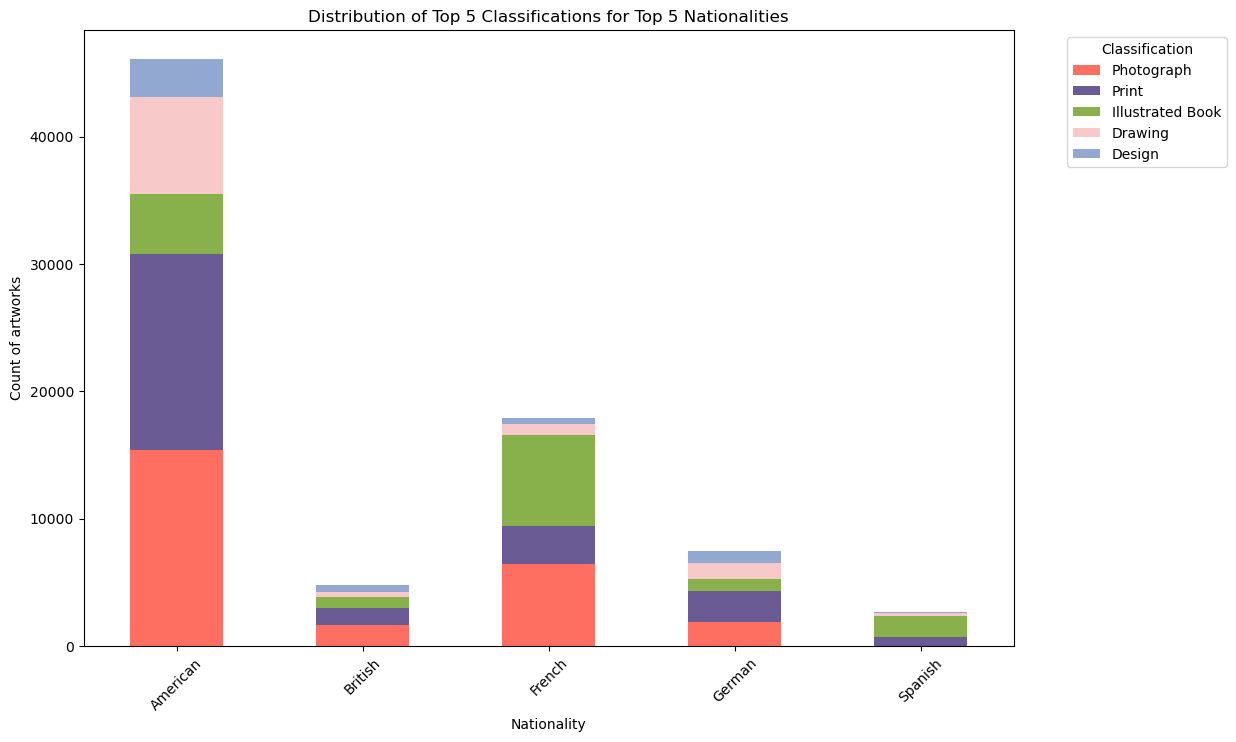

In [19]:
group_class = top_data.groupby(['Nationality_x', 'Classification']).size().unstack(fill_value=0)
top_class = group_class.sum().nlargest(5).index.tolist()

group_class = group_class[top_class]

# Ploting the graph
group_class.plot(kind='bar', stacked=True, figsize=(12, 8), color = colours)
plt.title('Distribution of Top 5 Classifications for Top 5 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count of artworks')
plt.xticks(rotation=45)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


> ### INSIGHTS:
> In America, photographs and prints exhibit similar levels of representation, both approximately at 15,000 instances, with drawing trailing slightly behind at around 8,000 instances. Illustrated books and designs show relatively lower contributions, indicating a less prominent presence in the collection. Conversely, in France, photographs and illustrated books emerge as dominant classifications. Germany displays a balanced distribution, Spain's contribution primarily centers around prints and illustrated books, with a limited presence of drawings. In Britain, photographs emerge as the dominant classification, suggesting a strong emphasis on this medium within their contributions.     

---

> ## Stacked Bar Graph
> Purpose: Examine acquisition sources by nationality

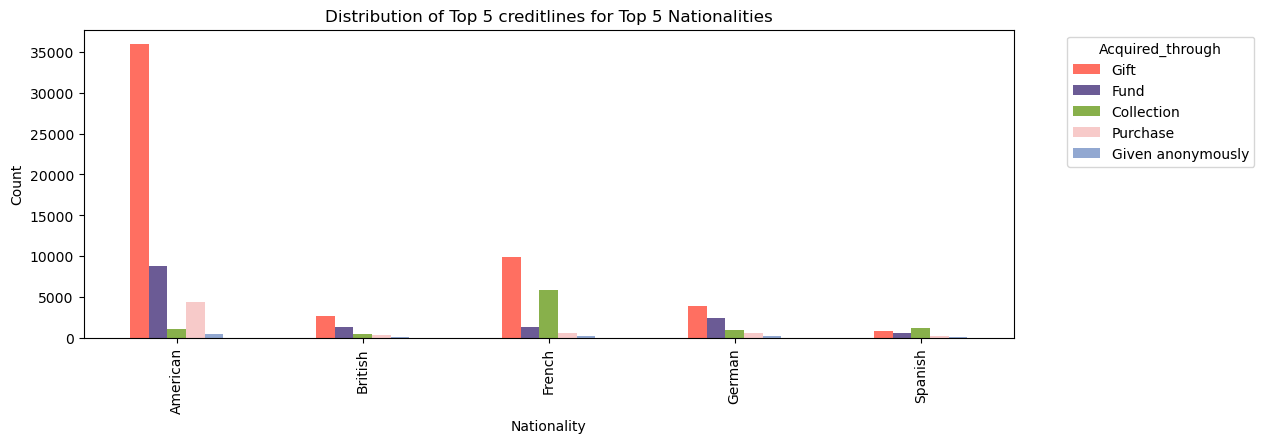

In [23]:
group_credit = top_data.groupby(['Nationality_x', 'Acquired_through']).size().unstack(fill_value=1)
top_credit = group_credit.sum().nlargest(5).index.tolist()

group_credit = group_credit[top_credit]

# Ploting the graph
group_credit.plot(kind='bar',  figsize=(12, 4), color=colours)
plt.title('Distribution of Top 5 creditlines for Top 5 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Acquired_through', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


> ### INSIGHTS:
> Notably, American art predominantly entered collections through gifts, totaling approximately 35,000 instances, followed by funds contributing around 10,000 instances. Similarly, in France, significant contributions come from gifts (12,000) and collections (10,000). In both Britain and Germany, gifts constitute the primary source, followed by funds, while other credit lines have minimal presence. Interestingly, Spain stands out as the only country with collections as the most significant contributor, with others being negligible.

---

>## Line Plot
> Purpose: Visualize number of artists over time.

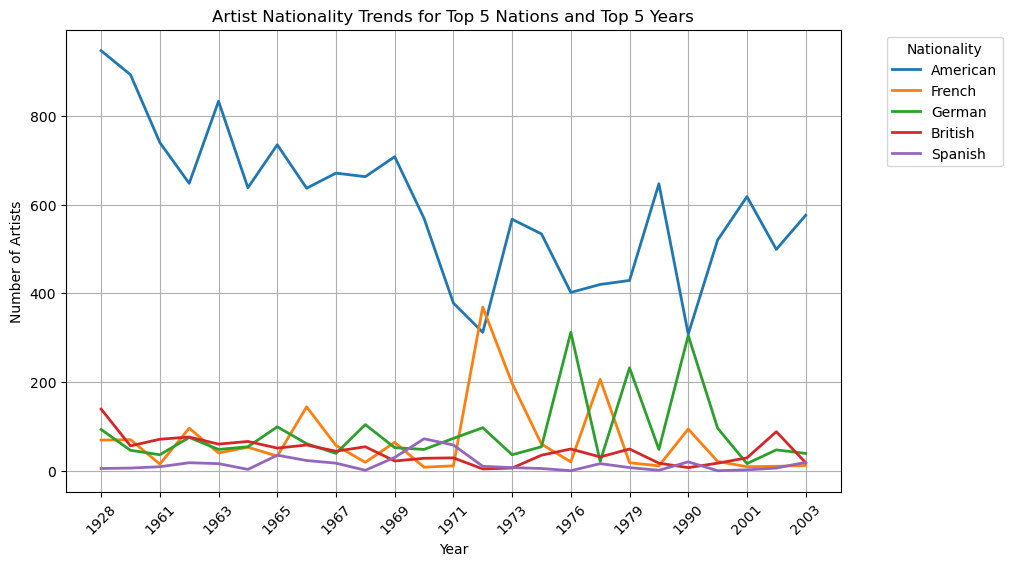

In [43]:
group_trends = merged_df.groupby(['Date_acquired', 'Nationality_x']).size().unstack(fill_value=0)
top_5n = group_trends.sum().nlargest(5).index
top_years = group_trends.sum(axis=1).nlargest(25).index
top_trends = group_trends[top_5n].loc[top_years]
#sort
top_years_sorted = sorted(top_years)

# Plotting the graph 
top_trends.plot(kind='line', figsize=(10, 6), linewidth=2)
plt.title('Artist Nationality Trends for Top 5 Nations and Top 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Artists')
plt.grid(True)
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, len(top_years_sorted), len(top_years_sorted)//10), top_years_sorted[::len(top_years_sorted)//10], rotation=45)
plt.show()

> ## INSIGHTS:
> In America, the number of artists gradually declined, particularly evident between 1969 and 1971, with a notable decrease from 900 in 1928 to 550 in 2003. France exhibited relatively stable numbers of artists from 1928 to 1971, hovering around 100, followed by a sudden rise to almost 400 in 1972, after which it declined again. Similarly, Germany maintained a consistent number of artists from 1928 to 1975, around 100, before experiencing an increase to 300 in 1976. Spain and Britain showed relatively consistent numbers of artists throughout the years. 

---

> ## Interactive Bar Graph
> Purpose: Explore departmental distributions interactively.

In [59]:
def top_artists(nationality):
    artist = merged_df[merged_df['Nationality_x'] == nationality]
    top_artists = artist['DisplayName'].value_counts().nlargest(10)
    
    # Ploting the graph
    plt.figure(figsize=(10, 6))
    top_artists.plot(kind='bar', color='#FF6F61')
    plt.title(f'Top 10 Departments from {nationality}')
    plt.xlabel('Artist Name')
    plt.ylabel('Artwork Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


nationalities = merged_df['Nationality_x'].unique()
#widget
nationality_box = widgets.Dropdown(options=nationalities, description='Nationality:')
#ploting the interactive graph
interactive_plot = widgets.interactive(top_artists, nationality=nationality_box)
interactive_plot

interactive(children=(Dropdown(description='Nationality:', options=('American', 'Spanish', 'Danish', 'French',…

> ### INSIGHTS:
>  the interactive bar graph offers valuable insights into the prominent artists and their contributions to the cultural heritage of different nations, shedding light on the diversity, richness, and interconnectedness of the global art scene.
  
> Through this graph it was observed that many nations like  Afghanistan, Iraq, Wales, the United Arab Emirates, and Bangladesh only have 1 or 2 artist whose works have been documented in moma collection.   

---

<hr style="border:1px solid black; width:98%" />